# 바나나 분류 프로젝트

1. 라이브러리 가져오기
2. 필요한 함수 정의하기 - averagecolor() , evaluateaccuracy()
3. 데이터 준비하기 
   수집한 이미지가 저장된 폴더를 하나씩 읽어 학습 데이터셋 구축하기
    
4. 모델 생성하고 학습하기 - sklearn 사용하기
5. 모델 평가하고 예측하기

# 방법1 
- 데이터 전체 읽어 X, y 구성 후 train_test_split() 사용하여 학습용/테스트용 데이터 준비
- KNN 모델 사용

## 1. 라이브러리 가져오기

In [32]:
import cv2
import os
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

## 2. 특성 및 평가 함수 만들기

In [33]:
# 특성을 추출하는 함수 정의(평균 색상)
# def averagecolor(image):
#     return np.mean(image, axis=(0, 1))

def averagecolor(image):
    if image is not None:  # 이미지가 None이 아닐 때만 평균 색상을 계산합니다.
        return np.mean(image, axis=(0, 1))
    else:
        return None  # 이미지가 None일 경우 None을 반환합니다.

# def evaluateaccuracy(filenames, predictedY):
#     predictedY = np.array(predictedY)
#     if (np.sum(realtestY!=predictedY)>0):
#         print ("Wrong Predictions: (filename, labelled, predicted) ")
#         print (np.dstack([filenames,realtestY,predictedY]).squeeze()[(realtestY!=predictedY)])
#     # 전체 예측의 백분율로 일치하는 (정확한) 예측을 계산합니다.
#     return "Correct :"+ str(np.sum(realtestY==predictedY)) + ". Wrong: "+str(np.sum(realtestY!=predictedY)) + ". Correctly Classified: " + str(np.sum(realtestY==predictedY)*100/len(predictedY))+"%"

## 3. 데이터 준비하기

In [34]:
# 필요한 라이브러리 임포트
import cv2  # 이미지 처리를 위한 OpenCV 라이브러리
import os   # 파일 및 디렉토리 작업을 위한 모듈
import numpy as np  # 배열 연산을 위한 NumPy 라이브러리

# 1. 데이터 저장을 위한 빈 리스트 초기화
X = []  # 이미지의 특징값들을 저장할 리스트
y = []  # 각 이미지의 라벨 인덱스를 저장할 리스트

# 2. 데이터 폴더 경로와 라벨(클래스) 정의
path = "data/"  # 이미지가 저장된 메인 폴더 경로
labels = ['unripe', 'ripe', 'overripe']  # 분류할 과일의 상태 라벨들 (덜 익음, 익음, 과숙)

# 3. 각 라벨별로 반복하면서 이미지 데이터 수집
for label in labels:
   # 3-1. 현재 처리 중인 라벨 출력 (진행 상황 확인용)
   print("Loading training images for the label: " + label)
   
   # 3-2. 해당 라벨 폴더 내의 모든 파일 목록 가져오기
   for filename in os.listdir(path + label + "/"):
       
       # 3-3. 각 이미지 파일 읽기
       img = cv2.imread(path + label + "/" + filename)
       
       # 3-4. 이미지에서 특징 추출 (예: 평균 색상값)
       img_features = averagecolor(img)  # averagecolor 함수로 이미지의 평균 색상 계산
       
       # 3-5. 특징값을 X 리스트에 추가
       X.append(img_features)
       
       # 3-6. 현재 라벨의 인덱스를 y 리스트에 추가
       # labels.index(label)은 현재 라벨이 labels 리스트에서 몇 번째인지 찾음
       # 예: 'unripe'는 0, 'ripe'는 1, 'overripe'는 2
       y.append(labels.index(label))
       
# 결과 배열로 변환
X = np.array(X)
y = np.array(y)

# 4. 결과 확인 (데이터 로딩 완료)
# 여기서 X는 모든 이미지의 특징값들이 담긴 리스트
# y는 각 이미지의 클래스 라벨(0, 1, 2) 정보가 담긴 리스트
print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"첫 번째 샘플의 특징값: {X[0]}")
print(f"첫 번째 샘플의 라벨: {y[0]}")

Loading training images for the label: unripe
Loading training images for the label: ripe
Loading training images for the label: overripe

X shape: (179, 3)
y shape: (179,)
첫 번째 샘플의 특징값: [ 31.54294792 146.75905    154.52830625]
첫 번째 샘플의 라벨: 0


In [52]:
# 방법2
import cv2
import os
import numpy as np
from pathlib import Path

def load_image_data(data_path="data/", labels=None):
    """
    이미지 데이터와 라벨을 로드하는 함수
    
    :param data_path: 데이터 폴더 경로
    :param labels: 라벨 리스트 (기본값: ['unripe', 'ripe', 'overripe'])
    :return: X (특징 데이터), y (라벨 인덱스)
    """
    if labels is None:
        labels = ['unripe', 'ripe', 'overripe']
    
    X = []
    y = []
    
    # 데이터 경로가 존재하는지 확인
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"데이터 경로를 찾을 수 없습니다: {data_path}")
    
    # 각 라벨별로 이미지 로드
    for label_idx, label in enumerate(labels):
        label_path = os.path.join(data_path, label)
        
        # 라벨 폴더가 존재하는지 확인
        if not os.path.exists(label_path):
            print(f"경고: {label} 폴더를 찾을 수 없습니다.")
            continue
        
        print(f"\n{label} 라벨의 이미지를 불러오는 중...")
        
        # 폴더 내 이미지 파일 찾기
        image_files = [f for f in os.listdir(label_path) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        
        if not image_files:
            print(f"경고: {label} 폴더에 이미지가 없습니다.")
            continue
        
        total_files = len(image_files)
        print(f"  총 {total_files}개의 이미지를 처리합니다...")
        
        for idx, filename in enumerate(image_files):
            try:             
                img_path = os.path.join(label_path, filename)
                img = cv2.imread(img_path)
                
                # 이미지 읽기 실패 처리
                if img is None:
                    print(f"경고: {filename}을 읽을 수 없습니다.")
                    continue
                
                # 이미지 특징 추출
                img_features = average_color(img)
                
                # 특징이 추출되지 않은 경우 처리
                if img_features is None:
                    print(f"경고: {filename}에서 특징을 추출할 수 없습니다.")
                    continue
                
                X.append(np.array(img_features))
                y.append(label_idx)
                
            except Exception as e:
                print(f"오류: {filename} 처리 중 문제 발생: {e}")
    
    # 결과 배열로 변환
    X = np.array(X)
    y = np.array(y)
    
    # 결과 요약 출력
    print(f"\n데이터 로딩 완료:")
    print(f"총 샘플 수: {len(X)}")
    for label_idx, label in enumerate(labels):
        count = np.sum(y == label_idx)
        print(f"  {label}: {count}개")
    
    return X, y

def average_color(image):
    """
    이미지의 평균 색상을 계산하는 함수
    
    :param image: OpenCV로 읽은 이미지 (BGR 형식)
    :return: 평균 색상값 [B, G, R]
    """
    if image is None or image.size == 0:
        return None
    
    # 이미지의 평균 색상 계산
    avg_color = np.mean(image, axis=(0, 1))
    return avg_color.tolist()

# 사용 예제
if __name__ == "__main__":
    # 데이터 로드
    X, y = load_image_data()
    
    # 결과 확인
    print(f"\nX shape: {X.shape}")
    print(f"y shape: {y.shape}")
    print(f"첫 번째 샘플의 특징값: {X[0]}")
    print(f"첫 번째 샘플의 라벨: {y[0]}")


unripe 라벨의 이미지를 불러오는 중...
  총 60개의 이미지를 처리합니다...

ripe 라벨의 이미지를 불러오는 중...
  총 70개의 이미지를 처리합니다...

overripe 라벨의 이미지를 불러오는 중...
  총 49개의 이미지를 처리합니다...

데이터 로딩 완료:
총 샘플 수: 179
  unripe: 60개
  ripe: 70개
  overripe: 49개

X shape: (179, 3)
y shape: (179,)
첫 번째 샘플의 특징값: [ 31.54294792 146.75905    154.52830625]
첫 번째 샘플의 라벨: 0


## 3.모델 생성 및 학습하기

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
# 3. 모델 평가하기
print("테스트 정확도:{:.3f}".format(model_knn.score(X_test, y_test)))

테스트 정확도:0.500


In [55]:
# 4. 모델 예측하기
y_pred = model_knn.predict(X_test)

df_result = pd.DataFrame(columns=['Actual', 'Predicted'])
df_result['Actual'] = y_test
df_result['Predicted'] = y_pred
df_result.head()

,Actual,Predicted
0,1,0
1,0,0
2,1,0
3,1,1
4,1,1


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62        10
           1       0.57      0.42      0.48        19
           2       0.33      0.29      0.31         7

    accuracy                           0.50        36
   macro avg       0.47      0.50      0.47        36
weighted avg       0.51      0.50      0.49        36



In [57]:
# 모델 예측하기 - 테스트 폴더 레이블 구성하여 진행하기
import warnings
warnings.filterwarnings(action='ignore') 
from sklearn.metrics import classification_report

def averagecolor(image):
    if image is None:
        return None
    else:
        return np.mean(image, axis=(0, 1))

# 이미지 하위 디렉토리 3개 폴더에 있는 훈련 이미지를 반복합니다.
path = "./data/test/"
labels = ['unripe','ripe' , 'overripe']
X_test = []
y_test = []

# 각 레이블의 디렉토리를 반복하여 이미지를 로드하고 특징을 추출합니다.
for label in labels:
    print("Loading test images for the label:", label)
    class_folder = os.path.join(path, label)
    for filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, filename)
        image = cv2.imread(image_path)

        if image is not None:  # 이미지가 제대로 로드되었는지 확인합니다.
            img_features = averagecolor(image)
            if img_features is not None:  # 이미지 특징이 제대로 계산되었는지 확인합니다.
                X_test.append(img_features)                
                y_test.append(labels.index(label))
                #y_test.append(label)

# 이미지 특징과 레이블을 NumPy 배열로 변환합니다.
X_test = np.array(X_test, dtype=np.float32)  # float32로 형변환을 해줘야 할 수 있습니다.
y_test = np.array(y_test)

# 모델 예측
y_pred = model_knn.predict(X_test)

# 정확도 평가(sklearn 패키지는 유용한 보고서를 제공합니다)
print()
print(classification_report(y_test, y_pred))

print("테스트 정확도:{:.3f}".format(model_knn.score(X_test, y_test)))

Loading test images for the label: unripe
Loading test images for the label: ripe
Loading test images for the label: overripe

              precision    recall  f1-score   support

           0       0.47      0.70      0.56        10
           1       0.36      0.50      0.42        10
           2       1.00      0.10      0.18        10

    accuracy                           0.43        30
   macro avg       0.61      0.43      0.39        30
weighted avg       0.61      0.43      0.39        30

테스트 정확도:0.433


# 방법2
- train / test 데이터를 별도로 구성하여 각각 학습용/테스트용 데이터 준비
- KNN 모델 사용

In [41]:
# train dataset 생성하기
import cv2
import os
X_train2 = []
y_train2 = []

# 이미지 하위 디렉토리 3개 폴더에 있는 훈련 이미지를 반복합니다.
path = "data/"
labels = ['unripe', 'ripe', 'overripe']
for label in labels:
    print ("Loading training images for the label: "+label)
    
    # 하위 폴더의 모든 이미지를 읽어옵니다.
    for filename in os.listdir(path+label+"/"): 
        img = cv2.imread(path+label+"/"+filename)
        img_features = averagecolor(img)
        X_train2.append(np.array(img_features))
        y_train2.append(label)

Loading training images for the label: unripe
Loading training images for the label: ripe
Loading training images for the label: overripe


In [42]:
# test dataset 생성하기
import cv2
import os
X_test2 = []
y_test2 = []

# 이미지 하위 디렉토리 3개 폴더에 있는 훈련 이미지를 반복합니다.
path = "data/test/"
labels = ['unripe', 'ripe', 'overripe']
for label in labels:
    print ("Loading training images for the label: "+label)
    
    # 하위 폴더의 모든 이미지를 읽어옵니다.
    for filename in os.listdir(path+label+"/"): 
        img = cv2.imread(path+label+"/"+filename)
        img_features = averagecolor(img)
        X_test2.append(np.array(img_features))
        y_test2.append(label)

Loading training images for the label: unripe
Loading training images for the label: ripe
Loading training images for the label: overripe


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train2, y_train2)

KNeighborsClassifier()

In [44]:
# 3. 모델 평가하고 예측하기 - 정확도, 
print("테스트 정확도:{:.3f}".format(model_knn.score(X_test2, y_test2)))

테스트 정확도:0.600


In [45]:
y_pred2 = model_knn.predict(X_test2)
df_result2 = pd.DataFrame(columns=['Actual', 'Predicted'])
df_result2['Actual'] = y_test2
df_result2['Predicted'] = y_pred2
df_result2.head()

,Actual,Predicted
0,unripe,unripe
1,unripe,unripe
2,unripe,ripe
3,unripe,overripe
4,unripe,unripe


In [46]:
y_pred2

array(['unripe', 'unripe', 'ripe', 'overripe', 'unripe', 'unripe',
       'unripe', 'unripe', 'unripe', 'ripe', 'ripe', 'unripe', 'overripe',
       'unripe', 'ripe', 'ripe', 'ripe', 'ripe', 'overripe', 'ripe',
       'overripe', 'ripe', 'overripe', 'ripe', 'ripe', 'ripe', 'overripe',
       'overripe', 'overripe', 'unripe'], dtype='<U8')

In [47]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

    overripe       0.62      0.50      0.56        10
        ripe       0.50      0.60      0.55        10
      unripe       0.70      0.70      0.70        10

    accuracy                           0.60        30
   macro avg       0.61      0.60      0.60        30
weighted avg       0.61      0.60      0.60        30



In [48]:
from sklearn.preprocessing import LabelEncoder  # 레이블을 숫자로 인코딩

encoder = LabelEncoder()                         
encodedtrainY2 = encoder.fit_transform(y_train2) 
encodedtestY2 = encoder.transform(y_test2) 

from sklearn import svm
#model = svm.SVC(gamma="scale", decision_function_shape='ovr')
model_svm = svm.SVC(gamma=0.001, decision_function_shape='ovr')
model_svm.fit(X_train2, encodedtrainY2)

SVC(gamma=0.001)

In [49]:
# 3. 모델 평가하고 예측하기 - 정확도, 
print("테스트 정확도:{:.3f}".format(model_svm.score(X_test2, encodedtestY2)))

테스트 정확도:0.600


In [50]:
y_pred3 = model_svm.predict(X_test2)

# 예측을 코드화합니다.
prediction = encoder.inverse_transform(y_pred3)

In [51]:
print(classification_report(y_test2, prediction))

              precision    recall  f1-score   support

    overripe       0.75      0.30      0.43        10
        ripe       0.47      0.70      0.56        10
      unripe       0.73      0.80      0.76        10

    accuracy                           0.60        30
   macro avg       0.65      0.60      0.58        30
weighted avg       0.65      0.60      0.58        30



# 방법3 
- 데이터 전체 읽어 X, y 구성 후 train_test_split() 사용하여 학습용/테스트용 데이터 준비
- 신경망 - CNN 모델 사용

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 64)      

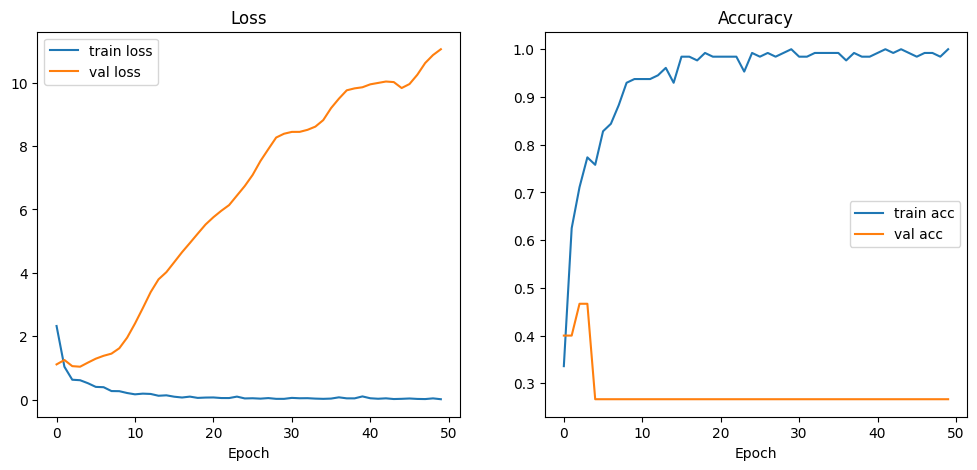

In [29]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization,
    Dropout, Flatten, Dense
)
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

# --- (이미지 로드 & 전처리 부분은 그대로) ---
path = "data/"
labels = ['unripe', 'ripe', 'overripe']
X, y = [], []

for label in labels:
    class_folder = os.path.join(path, label)
    for fname in os.listdir(class_folder):
        img = cv2.imread(os.path.join(class_folder, fname))
        if img is not None:
            img = cv2.resize(img, (48, 48))
            X.append(img)
            y.append(labels.index(label))

# NumPy 배열로 변환 (float32로 바로)
image_data = np.array(X, dtype='float32') / 255.0
class_labels = to_categorical(y, num_classes=len(labels))

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    image_data, class_labels,
    test_size=0.2, random_state=10
)

# --- 모델 정의 ---
num_classes = len(labels)
input_shape = (48, 48, 3)

model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Classification head
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()

# --- 모델 컴파일 ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- 모델 학습 ---
epochs = 50
batch_size = 32

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=2
)

# --- 평가 & 시각화 ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# 학습 곡선 그리기
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [30]:
# 모델 평가
eval_result = model.evaluate(X_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(*eval_result))

# 테스트 데이터 예측 및 시각화
preds = model.predict(X_test)
preds_classes = np.argmax(preds, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

2/2 [==============================] - 0s 2ms/step - loss: 12.0916 - accuracy: 0.2222
Test Loss: 12.09164810180664, Test Accuracy: 0.2222222238779068
2/2 [==============================] - 0s 3ms/step


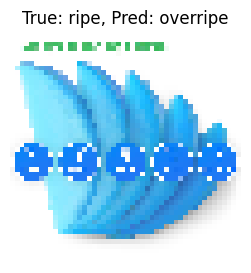

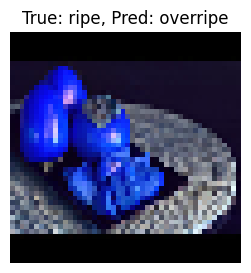

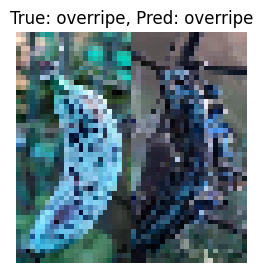

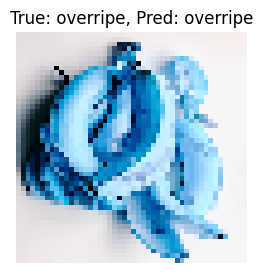

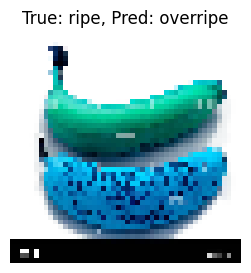

In [31]:
# 시각화할 이미지 개수
num_images = 5
samples_to_display = np.random.choice(X_test.shape[0], num_images, replace=False)

# 테스트 데이터 중 일부 이미지 시각화
# 레이블 리스트를 class_labels로 변경하였으므로, 아래 부분을 수정합니다.
for i, idx in enumerate(samples_to_display):
    img = X_test[idx]  # 차원 축소 필요 없음
    true_label_index = y_test_classes[idx]
    pred_label_index = preds_classes[idx]
    
    plt.figure(figsize=(5, 3))
    plt.imshow(img)  # 컬러 이미지로 변경, cmap='gray' 삭제
    plt.title(f"True: {labels[true_label_index]}, Pred: {labels[pred_label_index]}")
    plt.axis('off')
    plt.show()